# Russian heart attack dataset

### Link to [dataset](https://www.kaggle.com/datasets/ashaychoudhary/heart-attack-in-youth-vs-adult-in-russia/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.offline import init_notebook_mode

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv('data/heart_attack_russia_youth_vs_adult.csv')

print(df.shape)
df.head()

(50000, 30)


,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [4]:
df.describe()

,ID,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Stress_Level,Sleep_Hours,Health_Awareness,Daily_Water_Intake,Mental_Health
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,25000.500000,35.991820,120.058636,199.852762,24.983912,79.988980,5.503700,7.011464,3.007100,2.997782,5.48674
std,14433.901067,14.110139,14.975835,49.998331,5.003784,11.804567,2.870741,1.740651,1.410351,1.149608,2.86076
min,1.000000,12.000000,60.000000,-18.700000,2.900000,60.000000,1.000000,4.000000,1.000000,1.000000,1.00000
25%,12500.750000,24.000000,109.900000,166.100000,21.600000,70.000000,3.000000,5.500000,2.000000,2.000000,3.00000
50%,25000.500000,36.000000,120.050000,199.900000,25.000000,80.000000,6.000000,7.000000,3.000000,3.000000,5.00000
75%,37500.250000,48.000000,130.200000,233.500000,28.400000,90.000000,8.000000,8.500000,4.000000,4.000000,8.00000
max,50000.000000,60.000000,188.400000,398.800000,46.100000,100.000000,10.000000,10.000000,5.000000,5.000000,10.00000


In [5]:
df.describe(include='object')

,Gender,Region,Exercise_Level,Alcohol_Consumption,Diet,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural
count,50000,50000,50000,24976,50000,50000,50000,50000,50000,50000,50000
unique,3,3,3,2,3,4,3,3,3,4,2
top,Female,Urban,Moderate,Moderate,Healthy,Employed,Middle,Moderate,Secondary,Married,Urban
freq,24155,25034,24946,20022,19789,25166,20025,24828,20064,25099,30142


In [6]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [10]:
df = df.drop('ID', axis=1)
df

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,50,Male,Rural,110.0,196.5,15.9,76,High,False,Moderate,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,NaN,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,Moderate,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,Moderate,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,19,Female,Urban,108.0,224.5,27.5,67,Low,False,NaN,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,56,Other,Rural,87.7,256.8,25.3,71,Low,True,Moderate,...,Middle,High,Primary,Divorced,Urban,True,4,4.9,1,False
49996,16,Male,Rural,125.2,102.9,25.1,77,Moderate,True,NaN,...,Middle,High,Secondary,Single,Urban,False,3,4.4,4,True
49997,46,Female,Suburban,116.2,160.6,27.7,63,Low,True,Moderate,...,Middle,Low,Secondary,Single,Urban,False,2,2.4,7,False
49998,24,Female,Rural,104.6,180.4,29.2,60,Moderate,True,Moderate,...,Low,Moderate,Primary,Widowed,Urban,False,3,3.1,5,False


In [11]:
df.isnull().sum()

Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

In [15]:
df = df.dropna(axis=0)

print(df.shape)
df.isnull().sum()

(24976, 29)


Age                      0
Gender                   0
Region                   0
Blood_Pressure           0
Cholesterol              0
BMI                      0
Heart_Rate               0
Exercise_Level           0
Smoking                  0
Alcohol_Consumption      0
Diabetes                 0
Family_History           0
Stress_Level             0
Heart_Attack             0
Angina                   0
Heart_Disease_History    0
Diet                     0
Sleep_Hours              0
Occupation               0
Income_Level             0
Physical_Activity        0
Education_Level          0
Marital_Status           0
Urban_Rural              0
Medication               0
Health_Awareness         0
Daily_Water_Intake       0
Mental_Health            0
Obesity                  0
dtype: int64

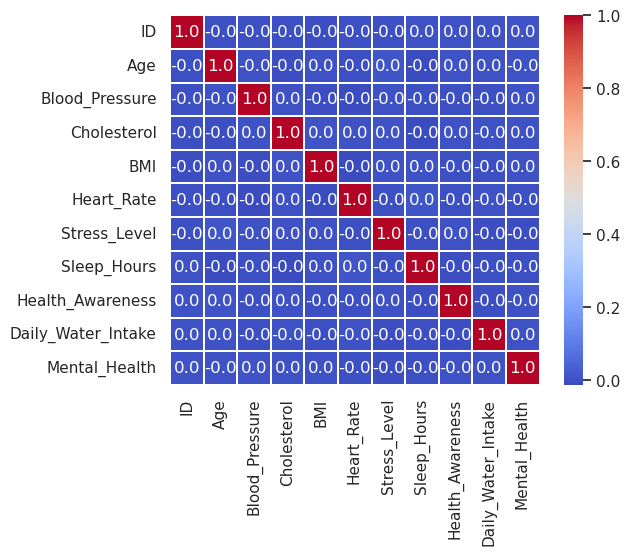

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');